<a href="https://colab.research.google.com/github/Ksenia234560-23/Wisualization-With-Seaborn_Skomorokhova/blob/main/_27_05_2023_visualization_with_seaborn_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/cpearce/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Geographic Data with Basemap](04.13-Geographic-Data-With-Basemap.ipynb) | [Contents](Index.ipynb) | [Further Resources](04.15-Further-Resources.ipynb) >

<a href="https://colab.research.google.com/github/cpearce/PythonDataScienceHandbook/blob/master/notebooks/04.14-Visualization-With-Seaborn.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# **Визуализация с помощью Seaborn**

Matplotlib оказался невероятно полезным и популярным инструментом визуализации, но даже заядлые пользователи признают, что он зачастую оставляет желать лучшего. Часто возникает несколько обоснованных жалоб на Matplotlib:

До версии 2.0 значения по умолчанию Matplotlib не были лучшим выбором. Он был основан на MATLAB примерно в 1999 году, и это часто проявляется.
API Matplotlib имеет относительно низкий уровень. Выполнение сложной статистической визуализации возможно, но часто требует большого количества шаблонного кода.
Matplotlib появился более чем на десять лет раньше Pandas и поэтому не предназначен для использования с Pandas DataFrames. Чтобы визуализировать данные из DataFrame Pandas, вы должны извлечь каждую серию и часто объединять их вместе в правильный формат. Было бы лучше иметь библиотеку графиков, которая могла бы разумно использовать метки DataFrame в графике.
Ответом на эти проблемы является Seaborn. Seaborn предоставляет API поверх Matplotlib, который предлагает разумный выбор стиля графика и цветов по умолчанию, определяет простые функции высокого уровня для распространенных типов статистических графиков и интегрируется с функциями, предоставляемыми Pandas DataFrames.

Честно говоря, команда Matplotlib решает эту проблему: недавно она добавила инструменты plt.style, обсуждаемые в разделе «Настройка Matplotlib: конфигурации и таблицы стилей», и начинает более плавно обрабатывать данные Pandas. Версия библиотеки 2.0 будет включать новую таблицу стилей по умолчанию, которая улучшит существующее положение дел. Но по всем только что рассмотренным причинам Seaborn остается чрезвычайно полезным дополнением.

# Seaborn против Matplotlib

Вот пример простого графика случайного блуждания в Matplotlib с использованием классического форматирования графика и цветов. Начнем с типичного импорта:

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

Теперь мы создаем некоторые данные случайного блуждания:

In [ ]:
# Создаём некоторые данные
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)


И сделайте простой сюжет:

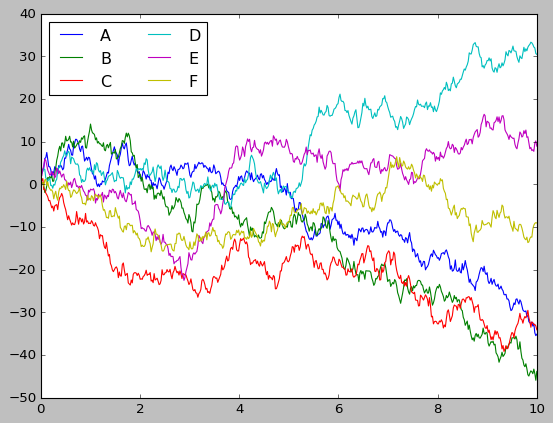

In [ ]:
# Постройка данных с настройками Matplotlib по умолчанию.
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

Хотя результат содержит всю информацию, которую мы хотели бы передать, он делает это не так уж и эстетично и даже выглядит немного старомодно в контексте визуализации данных 21-го века.

Теперь давайте посмотрим, как это работает с Seaborn. Как мы увидим, Seaborn имеет множество собственных процедур построения графиков высокого уровня, но он также может перезаписывать параметры Matplotlib по умолчанию и, в свою очередь, получать даже простые сценарии Matplotlib для получения значительно превосходящего результата. Мы можем установить стиль, вызвав метод set() Seaborn. По соглашению Seaborn импортируется как sns:

In [ ]:
import seaborn as sns
sns.set()

Теперь давайте повторим те же две строки, что и раньше:

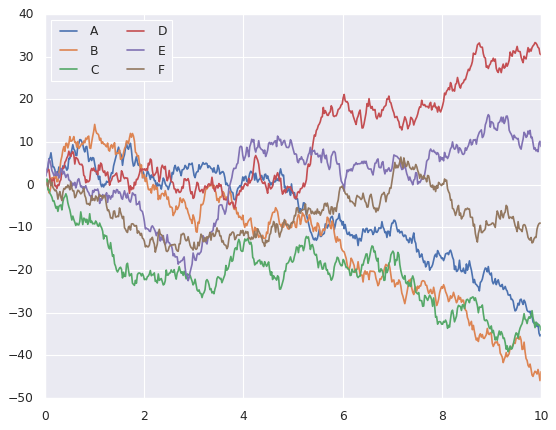

In [ ]:
# тот же код построения, что и выше!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');


Ах, гораздо лучше!

# Исследование участков Сиборна

Основная идея Seaborn заключается в том, что он предоставляет команды высокого уровня для создания различных типов графиков, полезных для исследования статистических данных и даже для некоторой настройки статистических моделей.

Давайте взглянем на несколько наборов данных и типов графиков, доступных в Seaborn. Обратите внимание, что все следующее можно сделать с помощью необработанных команд Matplotlib (это, по сути, то, что Seaborn делает «под капотом»), но Seaborn API гораздо удобнее.

# Гистограммы, KDE и плотности

Часто при визуализации статистических данных все, что вам нужно, — это построить гистограммы и совместные распределения переменных. Мы видели, что в Matplotlib это относительно просто:

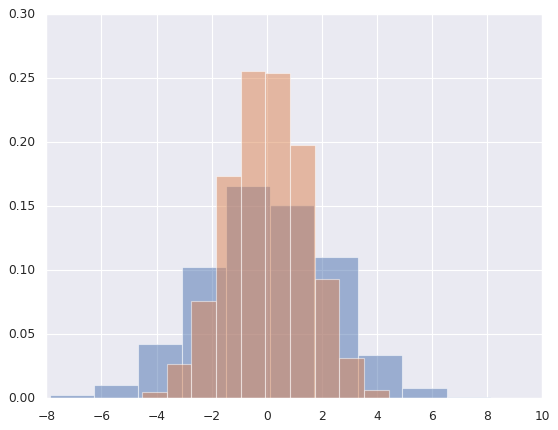

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

plt.show()

Вместо гистограммы мы можем получить плавную оценку распределения, используя оценку плотности ядра, что Сиборн делает с помощью sns.kdeplot:

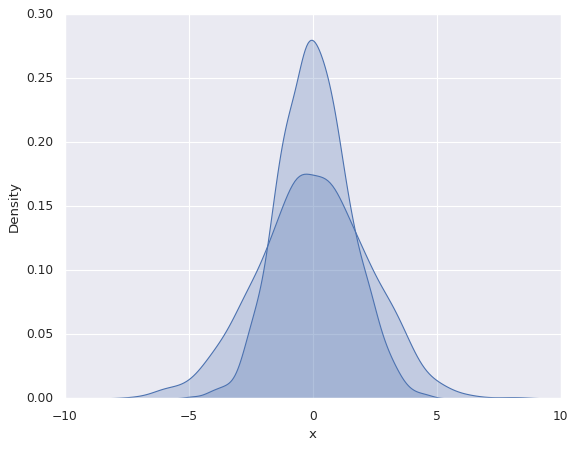

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Генерация данных
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

# Построение графиков плотности
for col in 'xy':
    sns.kdeplot(data[col], fill=True)  # Используйте fill=True вместо shade=True

plt.show()

Гистограммы и KDE можно объединить с помощью distplot

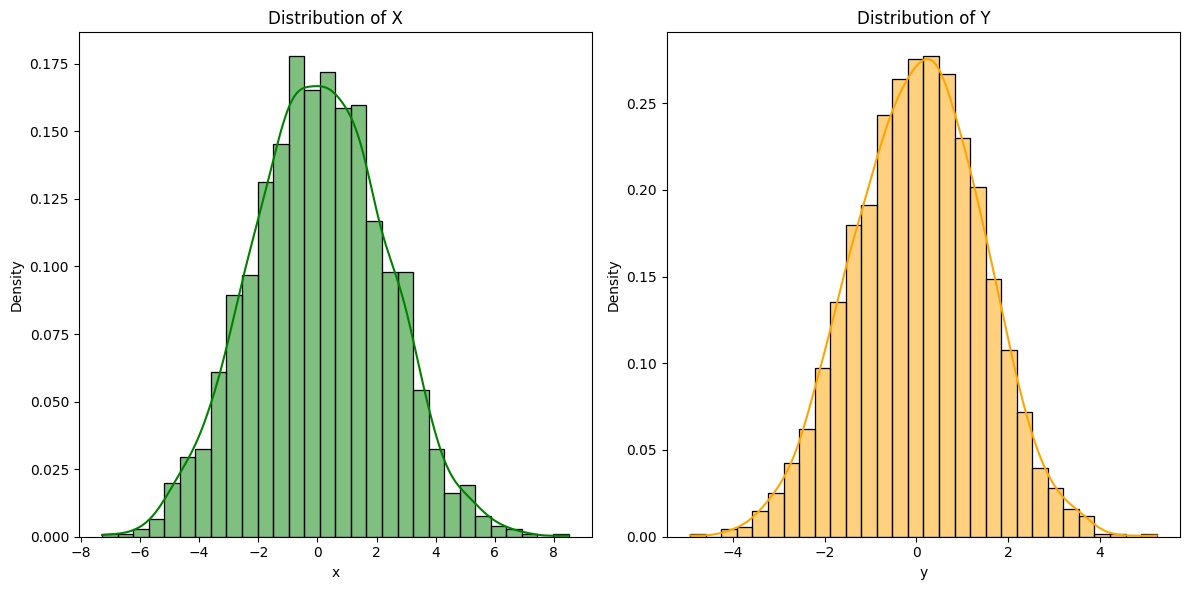

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Генерация данных
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

# Построение распределений
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # График для колонки 'x'
sns.histplot(data['x'], kde=True, stat='density', bins=30, color='green', alpha=0.5)  # Гистограмма с плотностью
plt.title('Distribution of X')

plt.subplot(1, 2, 2)  # График для колонки 'y'
sns.histplot(data['y'], kde=True, stat='density', bins=30, color='orange', alpha=0.5)  # Гистограмма с плотностью
plt.title('Distribution of Y')

plt.tight_layout()
plt.show()


Если мы передадим полный двумерный набор данных в kdeplot, мы получим двумерную визуализацию данных:

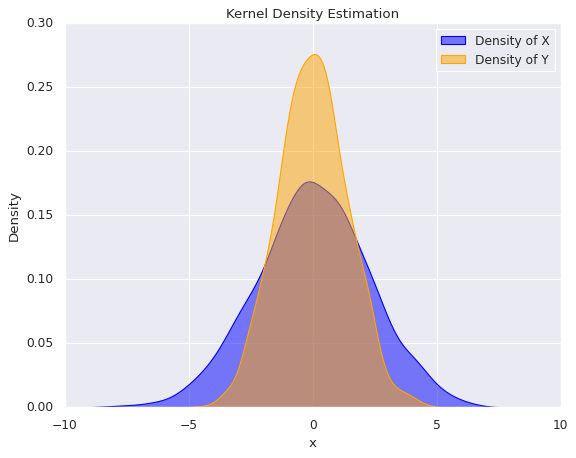

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Генерация данных
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

# Построение графиков плотности
plt.figure(figsize=(8, 6))
sns.kdeplot(data['x'], fill=True, color='blue', alpha=0.5, label='Density of X')
sns.kdeplot(data['y'], fill=True, color='orange', alpha=0.5, label='Density of Y')
plt.title('Kernel Density Estimation')
plt.legend()
plt.show()

Мы можем увидеть совместное распределение и предельные распределения вместе, используя sns.jointplot. Для этого графика мы установим стиль белого фона:

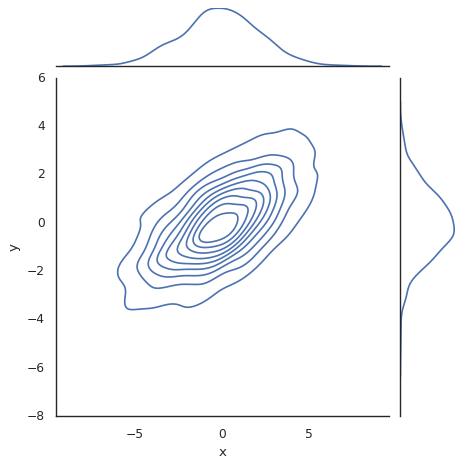

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Генерация данных
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

# Построение совместного графика плотности
with sns.axes_style('white'):
    sns.jointplot(x = "x", y = "y", data = data, kind='kde')


plt.show()  # Отображение графика

Есть и другие параметры, которые можно передать в Jointplot — например, вместо этого мы можем использовать шестиугольную гистограмму:

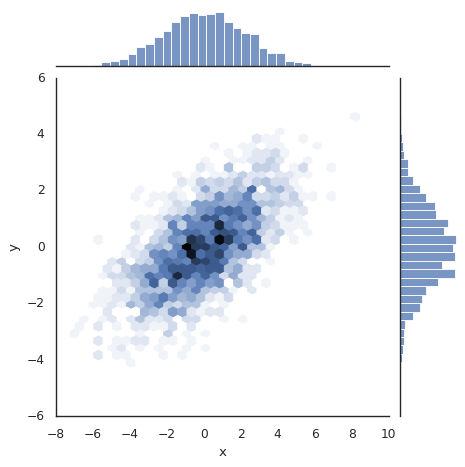

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Генерация данных
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

# Построение совместного гексагонального графика
with sns.axes_style('white'):
    sns.jointplot(x = "x",y =  "y", data = data, kind='hex')


plt.show()  # Отображение графика

# Парные сюжеты

Когда вы обобщаете совместные графики на наборы данных большего размера, вы получаете парные графики. Это очень полезно для изучения корреляций между многомерными данными, когда вы хотите построить график всех пар значений друг против друга.

Мы продемонстрируем это на хорошо известном наборе данных Iris, в котором перечислены размеры лепестков и чашелистиков трех видов ирисов:

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Визуализировать многомерные отношения между образцами так же просто, как вызвать sns.pairplot:

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


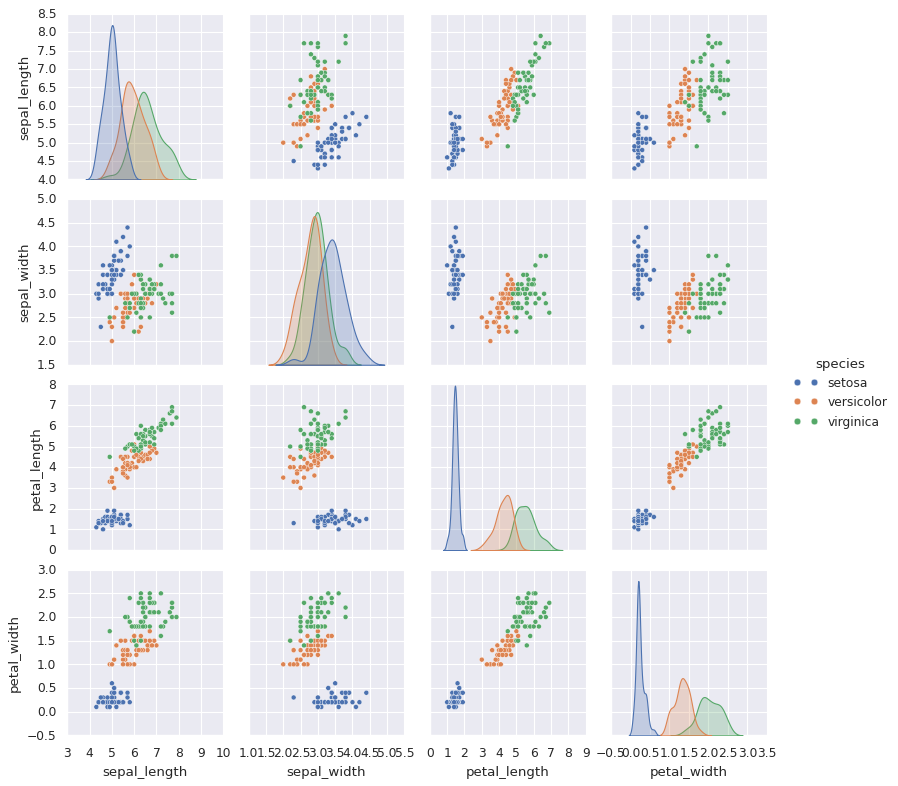

In [ ]:
sns.pairplot(iris, hue='species', size=2.5);

# Фасетные гистограммы

Иногда лучший способ просмотра данных — это гистограммы подмножеств. FacetGrid от Seaborn делает это чрезвычайно простым. Мы рассмотрим некоторые данные, которые показывают сумму, которую персонал ресторана получает в виде чаевых, на основе данных различных показателей:

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


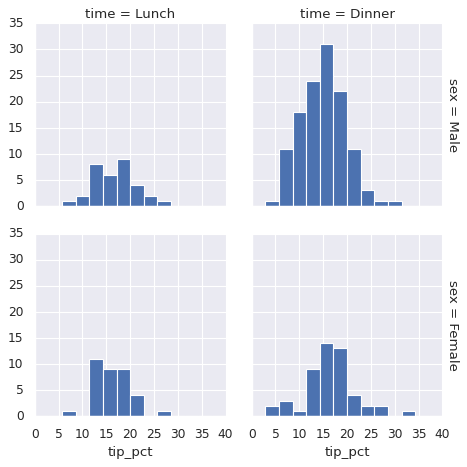

In [ ]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

# Факторные графики

Факторные графики также могут быть полезны для такого типа визуализации. Это позволяет просматривать распределение параметра внутри интервалов, определяемых любым другим параметром:

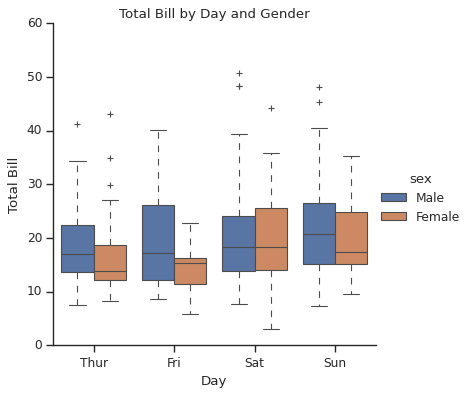

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
tips = sns.load_dataset('tips')

# Построение графика с использованием catplot
with sns.axes_style('ticks'):
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill")  # Установка подписей осей

plt.title('Total Bill by Day and Gender')  # Заголовок графика
plt.show()  # Отображение графика

# Совместные распределения

Подобно парному графику, который мы видели ранее, мы можем использовать sns.jointplot, чтобы показать совместное распределение между различными наборами данных, а также связанные с ним маргинальные распределения:

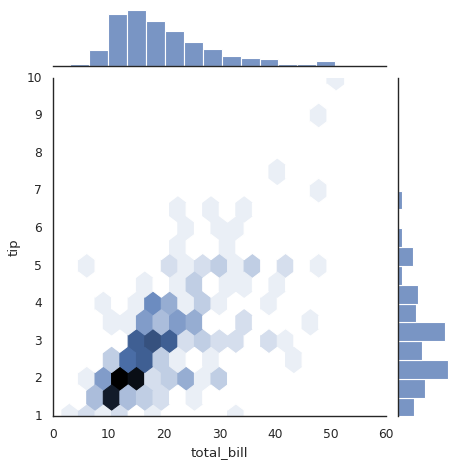

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
tips = sns.load_dataset('tips')

# Построение совместного гексагонального графика
with sns.axes_style('white'):
    sns.jointplot( x = "total_bill", y = "tip", data=tips, kind='hex')


plt.show()  # Отображение графика

Совместный график может даже выполнять автоматическую оценку плотности ядра и регрессию:

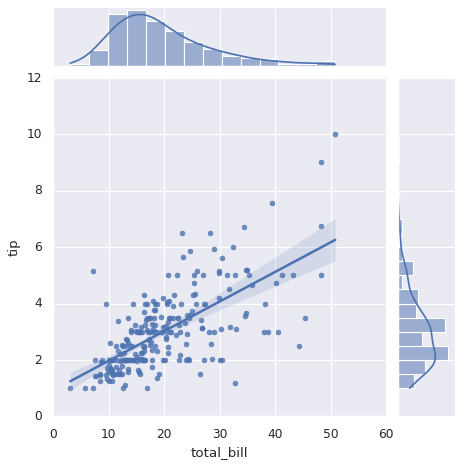

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
tips = sns.load_dataset('tips')

# Построение совместного графика с регрессионной линией
sns.jointplot(x = "total_bill",y = "tip", data=tips, kind='reg')


plt.show()  # Отображение графика

Барные участки

Временные ряды можно построить с помощью sns.factorplot. В следующем примере мы будем использовать данные «Планеты», которые мы впервые увидели в разделе «Агрегация и группировка»:

In [ ]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, '1989'),
  Text(1, 0, '1992'),
  Text(2, 0, '1994'),
  Text(3, 0, '1995'),
  Text(4, 0, '1996'),
  Text(5, 0, '1997'),
  Text(6, 0, '1998'),
  Text(7, 0, '1999'),
  Text(8, 0, '2000'),
  Text(9, 0, '2001'),
  Text(10, 0, '2002'),
  Text(11, 0, '2003'),
  Text(12, 0, '2004'),
  Text(13, 0, '2005'),
  Text(14, 0, '2006'),
  Text(15, 0, '2007'),
  Text(16, 0, '2008'),
  Text(17, 0, '2009'),
  Text(18, 0, '2010'),
  Text(19, 0, '2011'),
  Text(20, 0, '2012'),
  Text(21, 0, '2013'),
  Text(22, 0, '2014')])

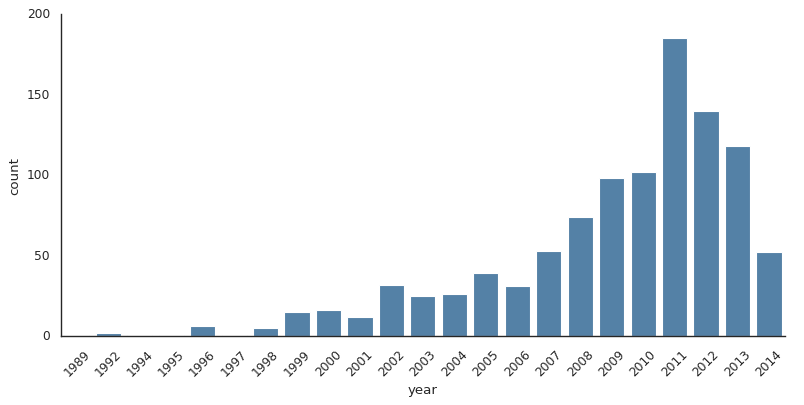

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
planets = sns.load_dataset('planets')

# Построение графика с использованием catplot
with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=2,
                    kind="count", color='steelblue')

plt.xticks(rotation=45)

Мы можем узнать больше, рассмотрев метод открытия каждой из этих планет:

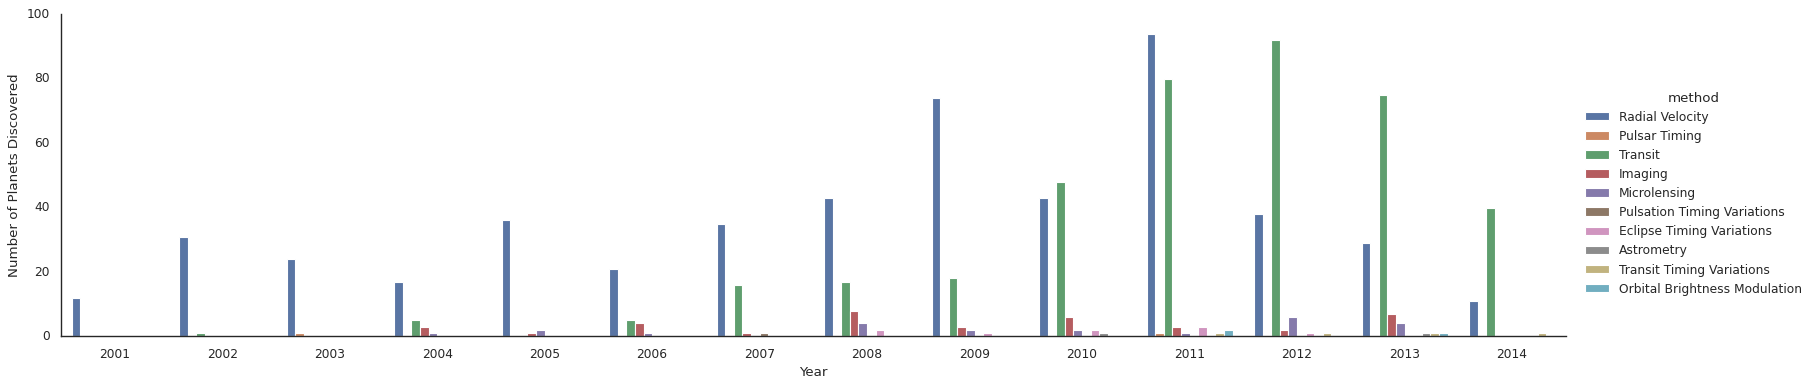

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

with sns.axes_style('white'):
    g = sns.catplot(x="year", data=planets, aspect=4.0, kind="count",
        hue="method", order=range(2001, 2015))
    g.set_axis_labels("Year", "Number of Planets Discovered")

plt.show()

For more information on plotting with Seaborn, see the [Seaborn documentation](http://seaborn.pydata.org/), a [tutorial](http://seaborn.pydata.org/
tutorial.htm), and the [Seaborn gallery](http://seaborn.pydata.org/examples/index.html).


# **Пример: изучение времени окончания марафона**
Здесь мы рассмотрим использование Seaborn для визуализации и понимания результатов марафона. Я собрал данные из источников в Интернете, агрегировал их, удалил любую идентифицирующую информацию и разместил на GitHub, где их можно скачать (если вы заинтересованы в использовании Python для очистки веб-страниц, я бы порекомендовал веб-скрапинг с Python от Райана Митчелла). Мы начнем с загрузки данных из Интернета и загрузки их в Pandas:

In [ ]:
# !curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

In [ ]:
import pandas as pd

# Загрузка данных из CSV-файла с обработкой ошибок
try:
    data = pd.read_csv('marathon-data.csv')
    # Отображение первых 5 строк датасета
    print(data.head())
except FileNotFoundError:
    print("Ошибка: файл 'marathon-data.csv' не найден.")
except pd.errors.EmptyDataError:
    print("Ошибка: CSV-файл пуст.")
except pd.errors.ParserError:
    print("Ошибка: проблема с парсингом CSV-файла.")
except Exception as e:
    print(f"Произошла ошибка: {e}")

Ошибка: файл 'marathon-data.csv' не найден.


По умолчанию Pandas загружает столбцы времени в виде строк Python (тип объекта); мы можем увидеть это, посмотрев на атрибут dtypes DataFrame:

In [ ]:
data.dtypes

,0
x,float64
y,float64


Пунктирная линия показывает, где будет находиться время человека, если он пробежит марафон в совершенно устойчивом темпе. Тот факт, что распределение находится выше этого значения, указывает (как и следовало ожидать), что большинство людей замедляют темп на марафоне. Если вы участвовали в соревнованиях, вы знаете, что о тех, кто делает противоположное — бежит быстрее во второй половине забега, — говорят, что они «отрицательно разделили» забег.

Из почти 40 000 участников только 250 человек разделили свой марафон с отрицательным результатом.

Давайте посмотрим, есть ли какая-либо корреляция между этой дробной долей и другими переменными. Мы сделаем это, используя парную сетку, которая рисует графики всех этих корреляций:

KeyError: 'gender'

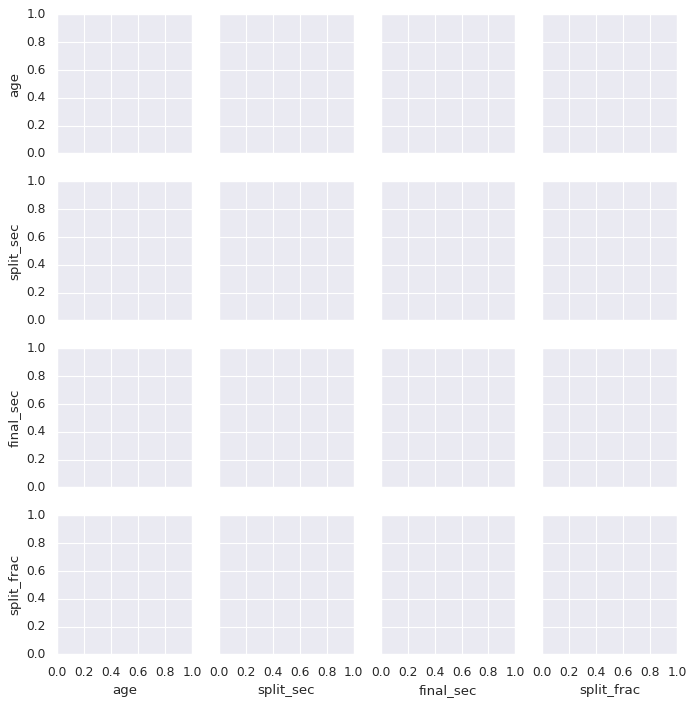

In [ ]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

Похоже, что доля разделения не особо коррелирует с возрастом, но коррелирует с итоговым временем: более быстрые бегуны, как правило, имеют более близкое к равномерному разделение времени на марафоне. (Здесь мы видим, что Seaborn не является панацеей от проблем Matplotlib, когда дело доходит до стилей графика: в частности, метки оси X перекрываются. Однако, поскольку выходные данные представляют собой простой график Matplotlib, методы настройки тиков можно использовать для настройки таких вещей, если это необходимо.)

Разница между мужчинами и женщинами здесь интересна. Давайте посмотрим на гистограмму дробных фракций для этих двух групп:

In [ ]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)
plt.xlabel('split_frac');

AttributeError: 'DataFrame' object has no attribute 'split_frac'

Интересно то, что мужчин, которые баллотируются почти поровну, гораздо больше, чем женщин! Это почти похоже на некое бимодальное распределение среди мужчин и женщин. Давайте посмотрим, сможем ли мы разобраться в том, что происходит, взглянув на распределение в зависимости от возраста.

Хороший способ сравнить распределения — использовать график скрипки.

In [ ]:
sns.violinplot("gender", "split_frac", data=data,
               palette=["lightblue", "lightpink"]);

TypeError: violinplot() got multiple values for argument 'data'

Это еще один способ сравнить распределение между мужчинами и женщинами.

Давайте посмотрим немного глубже и сравним эти скрипичные сюжеты в зависимости от возраста. Начнем с создания нового столбца в массиве, в котором будет указано десятилетие возраста каждого человека:

In [ ]:
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

AttributeError: 'DataFrame' object has no attribute 'age'

In [ ]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
    sns.violinplot("age_dec", "split_frac", hue="gender", data=data,
                   split=True, inner="quartile",
                   palette=["lightblue", "lightpink"]);

AttributeError: 'DataFrame' object has no attribute 'gender'

Глядя на это, мы можем увидеть, где различия в распределении мужчин и женщин: распределение мужчин в возрасте от 20 до 50 лет демонстрирует явно выраженную чрезмерную плотность в сторону более низкого разделения по сравнению с женщинами того же возраста (или любого возраста, если уж на то пошло).

Также удивительно, что 80-летние женщины, похоже, превосходят всех по показателям промежуточного времени. Вероятно, это связано с тем, что мы оцениваем распределение по небольшим числам, поскольку в этом диапазоне всего несколько бегунов:

In [ ]:
import pandas as pd

# Пример создания DataFrame
data = pd.DataFrame({
    'age': [25, 30, 85, 90, None, 78, 82, 65]
})

# Убедитесь, что в age нет пропусков. Если они есть, идею можно использовать для подсчета
above_80_count = (data['age'] > 80).sum()

# Вывод результата
print(f"Количество людей старше 80: {above_80_count}")

Количество людей старше 80: 3


Вернемся к мужчинам с отрицательным сплитом: кто эти бегуны? Коррелирует ли эта дробная часть с быстрым завершением? Мы можем это очень легко построить. Мы будем использовать regplot, который автоматически подгонит линейную регрессию к данным:

In [ ]:
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");

TypeError: lmplot() got multiple values for argument 'data'

Судя по всему, люди с быстрым шпагатом — это элитные бегуны, которые финишируют примерно за 15 000 секунд, или около 4 часов. У людей, которые медленнее этого, гораздо меньше шансов получить быстрый второй сплит.

<!--NAVIGATION-->
< [Geographic Data with Basemap](04.13-Geographic-Data-With-Basemap.ipynb) | [Contents](Index.ipynb) | [Further Resources](04.15-Further-Resources.ipynb) >

<a href="https://colab.research.google.com/github/cpearce/PythonDataScienceHandbook/blob/master/notebooks/04.14-Visualization-With-Seaborn.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
